In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [4]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
clf.score(X_test, y_test)

0.95614035087719296

In [6]:
y_pred = clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [9]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [10]:
clf.decision_function(X_test[12:15])

array([ 5.52621651, -1.17704977,  1.40199293])

In [11]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [12]:
(clf.decision_function(X_test[12:15]) > 0).astype(int)

array([1, 0, 1])

In [13]:
(clf.decision_function(X_test[12:15]) > 0.5).astype(int) * 2 - 1

array([ 1, -1,  1])

In [14]:
y_test[12:15]

array([1, 1, 1])

In [15]:
(clf.decision_function(X_test[12:15]) > -2).astype(int)

array([1, 1, 1])

In [16]:
(clf.decision_function(X_test[12:15]) > 2).astype(int)

array([1, 0, 0])

In [17]:
for th in range(-3,7):
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [18]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

AUC =  0.994283899651


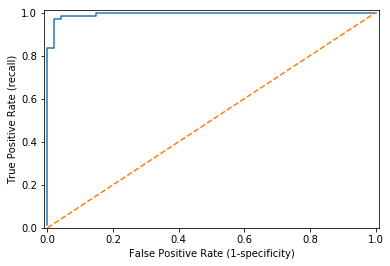

In [19]:
test_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, test_score)

plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

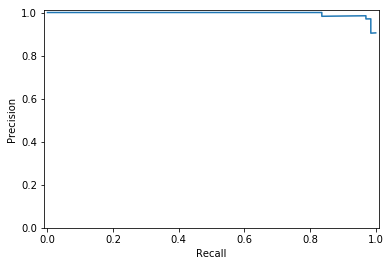

In [20]:
test_score = clf.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, test_score)

plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

result AUC =  0.994283899651
chance AUC =  0.564941251191
perfect AUC =  1.0


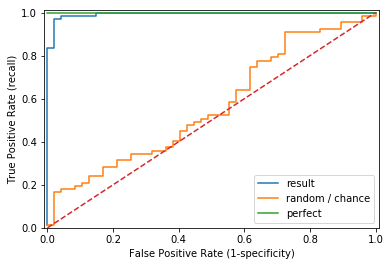

In [21]:
test_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="result")
print("result AUC = ", auc(fpr, tpr))

test_score = np.random.uniform(size=y_test.size)# もしまったくランダムなら
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="random / chance")
print("chance AUC = ", auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, y_test) # 完璧なら
plt.plot(fpr, tpr, label="perfect")
print("perfect AUC = ", auc(fpr, tpr))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

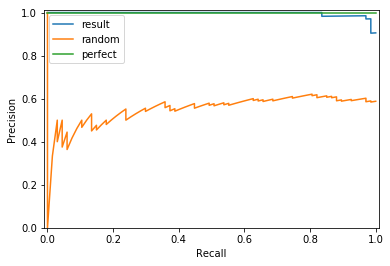

In [22]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="result")

test_score = np.random.uniform(size=y_test.size) # もしまったくランダムなら
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="random")

precision, recall, _ = precision_recall_curve(y_test, y_test) # 完璧なら
plt.plot(recall, precision, label="perfect")

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

http://homepages.inf.ed.ac.uk/ckiw/postscript/ijcv_voc09.pdf for average precision and interpolation

In [23]:
test_score = np.random.uniform(size=y_test.size) # もしまったくランダムなら
precision, recall, _ = precision_recall_curve(y_test, test_score)

precision_interp = np.maximum.accumulate(precision)

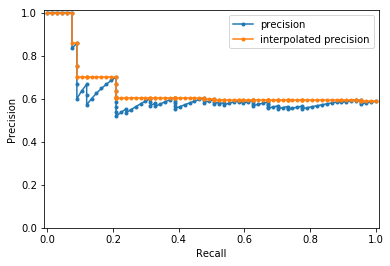

In [24]:
plt.plot(recall, precision, marker=".", label="precision")
plt.plot(recall, precision_interp, marker=".", label="interpolated precision")

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [25]:
all_precision = np.interp(np.arange(0, 1.1, 0.1),
                          recall[::-1], 
                          precision_interp[::-1])
AP = all_precision.mean()

In [26]:
print(all_precision)
print(AP)

[ 1.          0.7         0.7         0.60465116  0.60377358  0.59649123
  0.59433962  0.59433962  0.59433962  0.59433962  0.5877193 ]
0.651817614962


In [27]:
def calc_AP(precision, recall):
    precision_interp = np.maximum.accumulate(precision)
    all_precision = np.interp(np.arange(0, 1.1, 0.1), recall[::-1], precision_interp[::-1])
    AP = all_precision.mean()
    return AP

In [28]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
calc_AP(precision, recall)

0.99002308093217184

10 class problem

In [29]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [30]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [31]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
test_score = clf.decision_function(X_test)

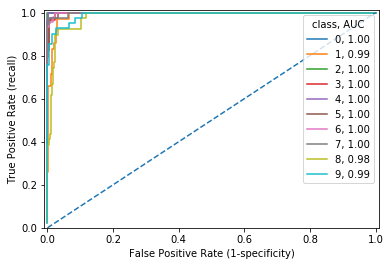

In [33]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), 
                            test_score[:,i])
    plt.plot(fpr, tpr, label="{0}, {1:.2f}".format(i, auc(fpr, tpr)))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best", title="class, AUC")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

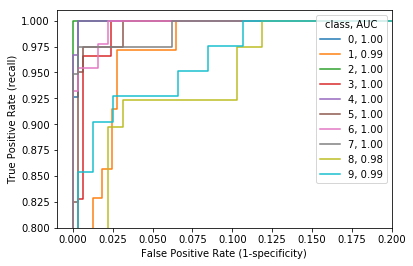

In [34]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), 
                            test_score[:,i])
    plt.plot(fpr, tpr, label="{0}, {1:.2f}".format(i, auc(fpr, tpr)))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best", title="class, AUC")
plt.xlim([-0.01, 0.2])
plt.ylim([0.8, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

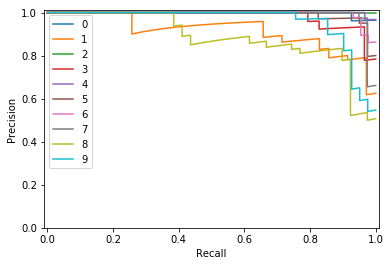

In [35]:
for i in range(10):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), 
                            test_score[:,i])
    plt.plot(recall, precision, label="{0}".format(i))
             
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [36]:
# mAP of PASCAL VOC by http://homepages.inf.ed.ac.uk/ckiw/postscript/ijcv_voc09.pdf

APs = []
for i in range(10):

    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), test_score[:,i])
    APs.append( calc_AP(precision, recall) )
    
APs = np.array(APs)
mAP = APs.mean()

print(APs)
print("mAP = ", mAP)

[ 0.99675325  0.91181621  1.          0.97064701  0.99706745  0.97948718
  0.98752228  0.96918336  0.88130281  0.94739345]
mAP =  0.964117300155
